# Predictive Analysis For Customer Rentention At Vodafone

Objective:
The objective of this project is to utilize machine-learning models within the CRISP-DM framework to predict customer churn at Vodafone Corporation. Identify key indicators of churn and propose effective retention strategies based on the analysis. Compile findings into a comprehensive presentation for the business development unit, emphasizing actionable insights to enhance customer retention efforts.



Hypothesis
In this section we stated our null and alternate hypothesis as well as the questions that we seek to answer.


**Null Hypothesis (H₀):** There is no significant association between a customer's tenure and the likelihood of churn.

**Alternative Hypothesis (H₁):** A customer's tenure is significantly associated with the likelihood of churn, suggesting that longer tenure reduces the probability of churn.

Analytical Questions:
1. What is our Churning rate?
2. What type of contract churns more customers?
3. What type of internet service churns more customers?
4. Which gender Churns more?
5. What is the longest period of time we have had a customer?
6. What is the relationship between tenure and Churn?

## Importations

In [6]:
# import necessary librairies for this project
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

Establishing a Connection To SQL Sever

In [7]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [8]:
# Get the values for the credentials you set in the '.env' file

server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE")

In [9]:
# creating a connection
connection_string = "DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3"

In [10]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

Data Loading From Various Sources

In [11]:
# load data from server 
query = ('SELECT* FROM LP2_Telco_churn_first_3000;')
first_data = pd.read_sql(query, connection)
first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
# check the data info
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [13]:
# Assuming second_data is your DataFrame
# Replace 'LP2_Telco-churn-last-2000.csv' with the actual path to your CSV file

csv_file_path = r"C:\Users\ALFRED\OneDrive\GitHub\LP2_Project_Churn\LP2_Telco-churn-last-2000.csv"

# Load the CSV file into a pandas DataFrame
second_data = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
second_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [14]:
# check the data info
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


Perform an Exploratory Data Analysis (EDA)

In [15]:
#perform an Exploratory Data Analysis (EDA) on the provided dataset
# Display basic information about the dataset
first_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [16]:
#Check the data shape
first_data.shape

(3000, 21)

The data above has 3000 rows and 21 columns.

In [17]:
# Check for missing values
first_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
#Checking for NaN values
first_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

The data above appear to have NaN values 

In [19]:
# Display data types of all columns
print(first_data.dtypes)

customerID           object
gender               object
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [20]:
# Display basic information about the dataset
second_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [21]:
#Check the data shape
second_data.shape

(2043, 21)

The data above has 2043 rows and 21 columns.

In [22]:
# Check for missing values
second_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# Display data types of all columns
print(second_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [24]:
#Checking for NaN values
second_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data above does not appear to have NaN values.

In [25]:
# Assuming first_data and second_data are your DataFrames
# Concatenate along rows (vertically)
concatenated_data = pd.concat([first_data, second_data], axis=0)

# Resetting the index after concatenation
concatenated_data.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
concatenated_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [26]:

# Standardizing the Partner column

# Replace True with 'Yes' and False with 'No'
concatenated_data['Partner'] = concatenated_data['Partner'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['Partner'].value_counts())



Partner
No     2585
Yes    2458
Name: count, dtype: int64


In [27]:
# Standardizing the Dependents column

# Replace True with 'Yes' and False with 'No'
concatenated_data['Dependents'] = concatenated_data['Dependents'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['Dependents'].value_counts())

Dependents
No     3482
Yes    1561
Name: count, dtype: int64


In [28]:
# Standardizing the PhoneService column

# Replace True with 'Yes' and False with 'No'
concatenated_data['PhoneService'] = concatenated_data['PhoneService'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['PhoneService'].value_counts())

PhoneService
Yes    4554
No      489
Name: count, dtype: int64


In [29]:
# Standardizing the MultipleLines column

# Replace True with 'Yes' and False with 'No'
concatenated_data['MultipleLines'] = concatenated_data['MultipleLines'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['MultipleLines'].value_counts())

MultipleLines
No                  2424
Yes                 2130
No phone service     220
Name: count, dtype: int64


In [30]:
# Standardizing the InternetService column

# Replace True with 'Yes' and False with 'No'
concatenated_data['InternetService'] = concatenated_data['InternetService'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['InternetService'].value_counts())

InternetService
Fiber optic    2248
DSL            1715
No             1080
Name: count, dtype: int64


In [31]:
# Standardizing the OnlineSecurity column

# Replace True with 'Yes' and False with 'No'
concatenated_data['OnlineSecurity'] = concatenated_data['OnlineSecurity'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['OnlineSecurity'].value_counts())

OnlineSecurity
No                     2507
Yes                    1456
No internet service     429
Name: count, dtype: int64


In [32]:
# Standardizing the DeviceProtection column

# Replace True with 'Yes' and False with 'No'
concatenated_data['DeviceProtection'] = concatenated_data['DeviceProtection'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['DeviceProtection'].value_counts())

DeviceProtection
No                     2219
Yes                    1744
No internet service     429
Name: count, dtype: int64


In [33]:
# Standardizing the TechSupport column

# Replace True with 'Yes' and False with 'No'
concatenated_data['TechSupport'] = concatenated_data['TechSupport'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['TechSupport'].value_counts())

TechSupport
No                     2472
Yes                    1491
No internet service     429
Name: count, dtype: int64


In [34]:
# Standardizing the StreamingTVcolumn

# Replace True with 'Yes' and False with 'No'
concatenated_data['StreamingTV'] = concatenated_data['StreamingTV'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['StreamingTV'].value_counts())

StreamingTV
No                     2018
Yes                    1945
No internet service     429
Name: count, dtype: int64


In [35]:
# Standardizing the StreamingMovies column

# Replace True with 'Yes' and False with 'No'
concatenated_data['StreamingMovies'] = concatenated_data['StreamingMovies'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['StreamingMovies'].value_counts())

StreamingMovies
Yes                    1982
No                     1981
No internet service     429
Name: count, dtype: int64


In [36]:
# Standardizing the PaperlessBilling column

# Replace True with 'Yes' and False with 'No'
concatenated_data['PaperlessBilling'] = concatenated_data['PaperlessBilling'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['PaperlessBilling'].value_counts())

PaperlessBilling
Yes    2996
No     2047
Name: count, dtype: int64


In [37]:
# Standardizing the Churn column

# Replace True with 'Yes' and False with 'No'
concatenated_data['Churn'] = concatenated_data['Churn'].replace({True: 'Yes', False: 'No'})

# Display the updated DataFrame
print(concatenated_data['Churn'].value_counts())

Churn
No     3706
Yes    1336
Name: count, dtype: int64


In [38]:
# Understanding the numerical columns further
concatenated_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214
std,0.368857,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.775000
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050003
max,1.000000,72.000000,118.650002


In [39]:
# Check for duplicates
concatenated_data.duplicated().sum()

0

In [40]:
concatenated_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

**Issues with the data**

1. Less than 4 cutomers have 0 months tenure.
2. Total charges column is an object.

**How to deal with the Issues**

1. Investigate and see if the tenure of these customers are actually 0.
2. Convert the total charges column to a float.

***Dealing with the issues***

In [41]:
#Issue 1. 
 # Assuming concatenated_data is your DataFrame
# Filter rows where tenure is 0
customers_with_tenure_zero = concatenated_data[concatenated_data['tenure'] == 0]

# Display the customers with tenure 0
customers_with_tenure_zero


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,None,...,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,None,...,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,,No


From the above table those customers actually have 0 tenure.

In [42]:
# Issue 2.
#concatenated_data = Convert 'TotalCharges' column to float
concatenated_data['TotalCharges'] = pd.to_numeric(concatenated_data['TotalCharges'], errors='coerce')

# Display the DataFrame after conversion
concatenated_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [43]:
#Checking if TotalCharges datatype has change to float 
print(concatenated_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Yes it all changed.

# Answering the questions.

1. What is our churn rate?

In [44]:
churn_rate = concatenated_data.groupby(['Churn'])['customerID'].count().reset_index()
churn_rate.sort_values(['customerID'], ascending = True, inplace=True)
churn_rate

,Churn,customerID
1,Yes,1336
0,No,3706


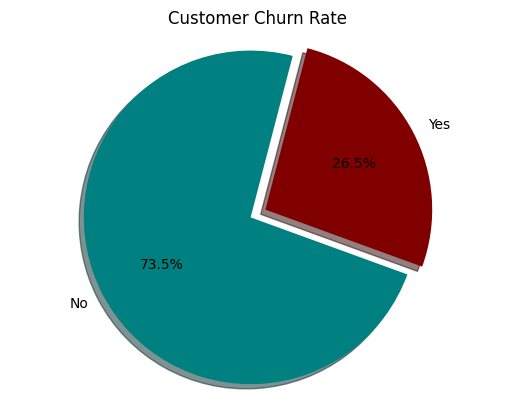

In [45]:
churn_rate_graph = churn_rate['customerID']
mycolors = ['maroon', 'teal']
myexplode = (0, 0.1)
plt.pie(churn_rate_graph, labels=churn_rate['Churn'],autopct='%1.1f%%', startangle=-20, shadow=True, colors=mycolors, explode=myexplode)
plt.title('Customer Churn Rate')
plt.axis('equal')
plt.show()

From the figure above, our churn rate is 26.5%

2. What type of contract churns more customers?

In [46]:
Contract_df = concatenated_data[['Contract','Churn']].copy()
Contract_df

,Contract,Churn
0,Month-to-month,No
1,One year,No
2,Month-to-month,Yes
3,One year,No
4,Month-to-month,Yes
...,...,...
5038,One year,No
5039,One year,No
5040,Month-to-month,No
5041,Month-to-month,Yes


In [47]:
contact_churn_count= Contract_df.groupby("Contract")["Churn"].value_counts().unstack()
contact_churn_count

Churn,No,Yes
Contract,,
Month-to-month,1560,1184
One year,933,122
Two year,1213,30


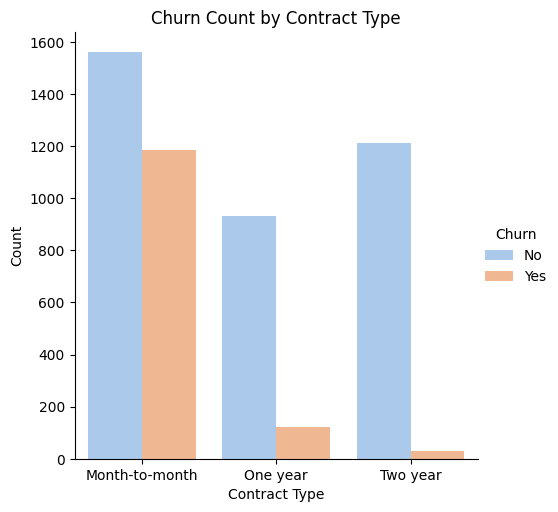

In [48]:
# Create a count plot using seaborn
sns.catplot(x="Contract", hue="Churn", kind="count", palette="pastel", data=Contract_df)

# Set the title and labels
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Show the plot
plt.show()


From the above Chart, we can infer that customers with month-to-month contracts exhibit the highest churn, while those with two-year contracts experience the lowest churn.

3. What type of internet service churns more customers?

In [49]:
internet_service_counts= concatenated_data.groupby(['InternetService','Churn']).size().unstack()
internet_service_counts

Churn,No,Yes
InternetService,,
DSL,1406,309
Fiber optic,1296,951
No,1004,76


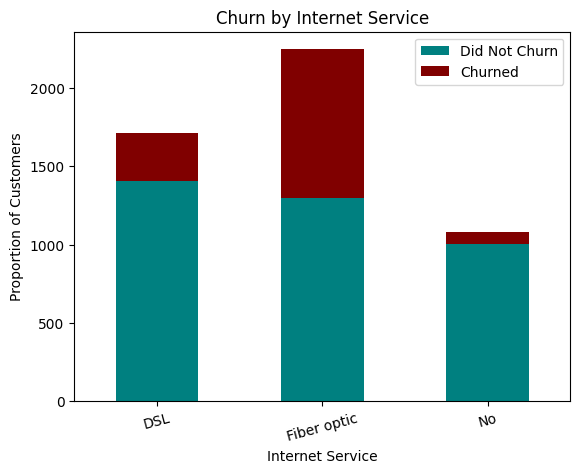

In [50]:
internet_service_counts.plot(kind='bar', stacked=True, color=['teal','maroon'],rot=15)
plt.xlabel('Internet Service')
plt.ylabel('Proportion of Customers')
plt.title('Churn by Internet Service')
plt.legend(['Did Not Churn', 'Churned'])

The above chart describe customers utilizing fiber optic internet service experienced an elevated churn rate.

4. Which gender churns more?

In [51]:
#count the number of males
gender_counts = concatenated_data['gender'].value_counts()
num_males=gender_counts['Male']
f'The total number of Males is {num_males}'

'The total number of Males is 2559'

In [52]:
#count the number of females
num_females=gender_counts['Female']
f'The total number of Females is {num_females}'

'The total number of Females is 2484'

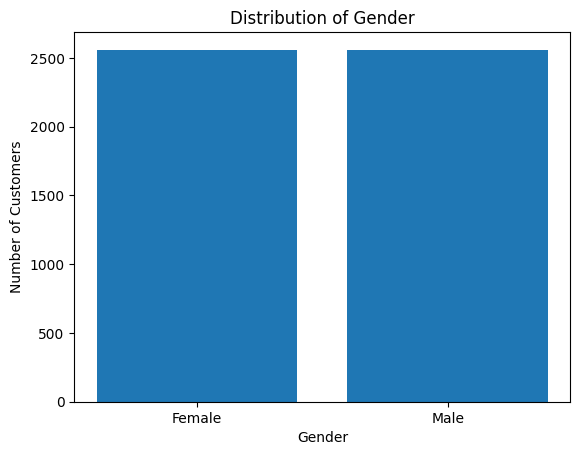

In [53]:
# Generate a bar chart to illustrate the findings.
labels = ['Female', 'Male']
values = [len(concatenated_data) - num_females, num_males]
plt.bar(labels, values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [54]:
# finding the number of  customers who churn and did not by gender
gender= concatenated_data.groupby("gender")["Churn"].value_counts().unstack()
gender

Churn,No,Yes
gender,,
Female,1823,661
Male,1883,675


In [55]:
# calculating the ratio of yes to no by gender 
gender['ratio'] = gender['Yes'] / gender['No']
gender

Churn,No,Yes,ratio
gender,,,
Female,1823,661,0.362589
Male,1883,675,0.358471


In [56]:
mean_ratio_by_gender = gender.groupby('gender')['ratio'].mean()
mean_ratio_by_gender

gender
Female    0.362589
Male      0.358471
Name: ratio, dtype: float64

In [57]:
f'The average ratio of males to females who churned is slightly greater than that of males.'

'The average ratio of males to females who churned is slightly greater than that of males.'

5. What is the longest period of time we have had a customer?

In [58]:
max_tenure = concatenated_data["tenure"].max()


f'The longest period we have retained a customer is {max_tenure} months'

'The longest period we have retained a customer is 72 months'

6. What is the relationship between tenure and churn?

In [59]:
churn_by_tenure = concatenated_data.sort_values('tenure', ascending=False)
churn_by_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1329,3910-MRQOY,Female,0,Yes,No,72,Yes,No,No,None,...,None,None,None,None,Two year,No,Bank transfer (automatic),19.400000,1496.449951,No
233,7083-MIOPC,Female,0,No,No,72,Yes,No,No,None,...,None,None,None,None,Two year,No,Credit card (automatic),20.250000,1566.900024,No
4700,8107-RZLNV,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),106.300000,7565.350000,No
3527,5985-BEHZK,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),105.000000,7578.050000,No
4707,2452-MRMZF,Female,1,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.700000,1937.400000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,None,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No


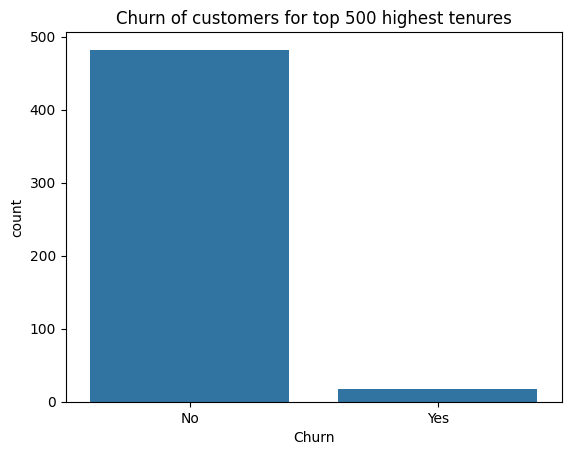

In [60]:

import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code...

# Churn by highest tenure
plt.title('Churn of customers for top 500 highest tenures')
sns.countplot(x='Churn', data=churn_by_tenure.head(500))
plt.show()


<Axes: title={'center': 'Churn of customers for bottom 500 highest tenures'}, xlabel='Churn', ylabel='count'>

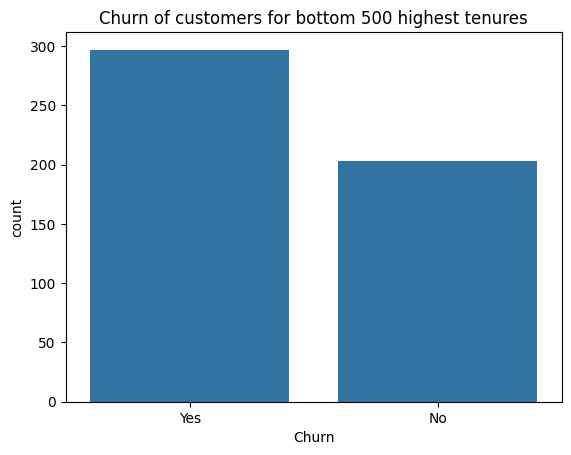

In [61]:
# Churn by lowest tenure
plt.title('Churn of customers for bottom 500 highest tenures')
sns.countplot(x ='Churn', data = churn_by_tenure.tail(500))

From above displayed, the longer the tenure of a customer the less likely they are to churn.

From our analysis, we fail to reject the Null Hypothesis; The longer a customer's tenure , the lesser the likelihood that the customer will churn.

#Univariate Data Analysis

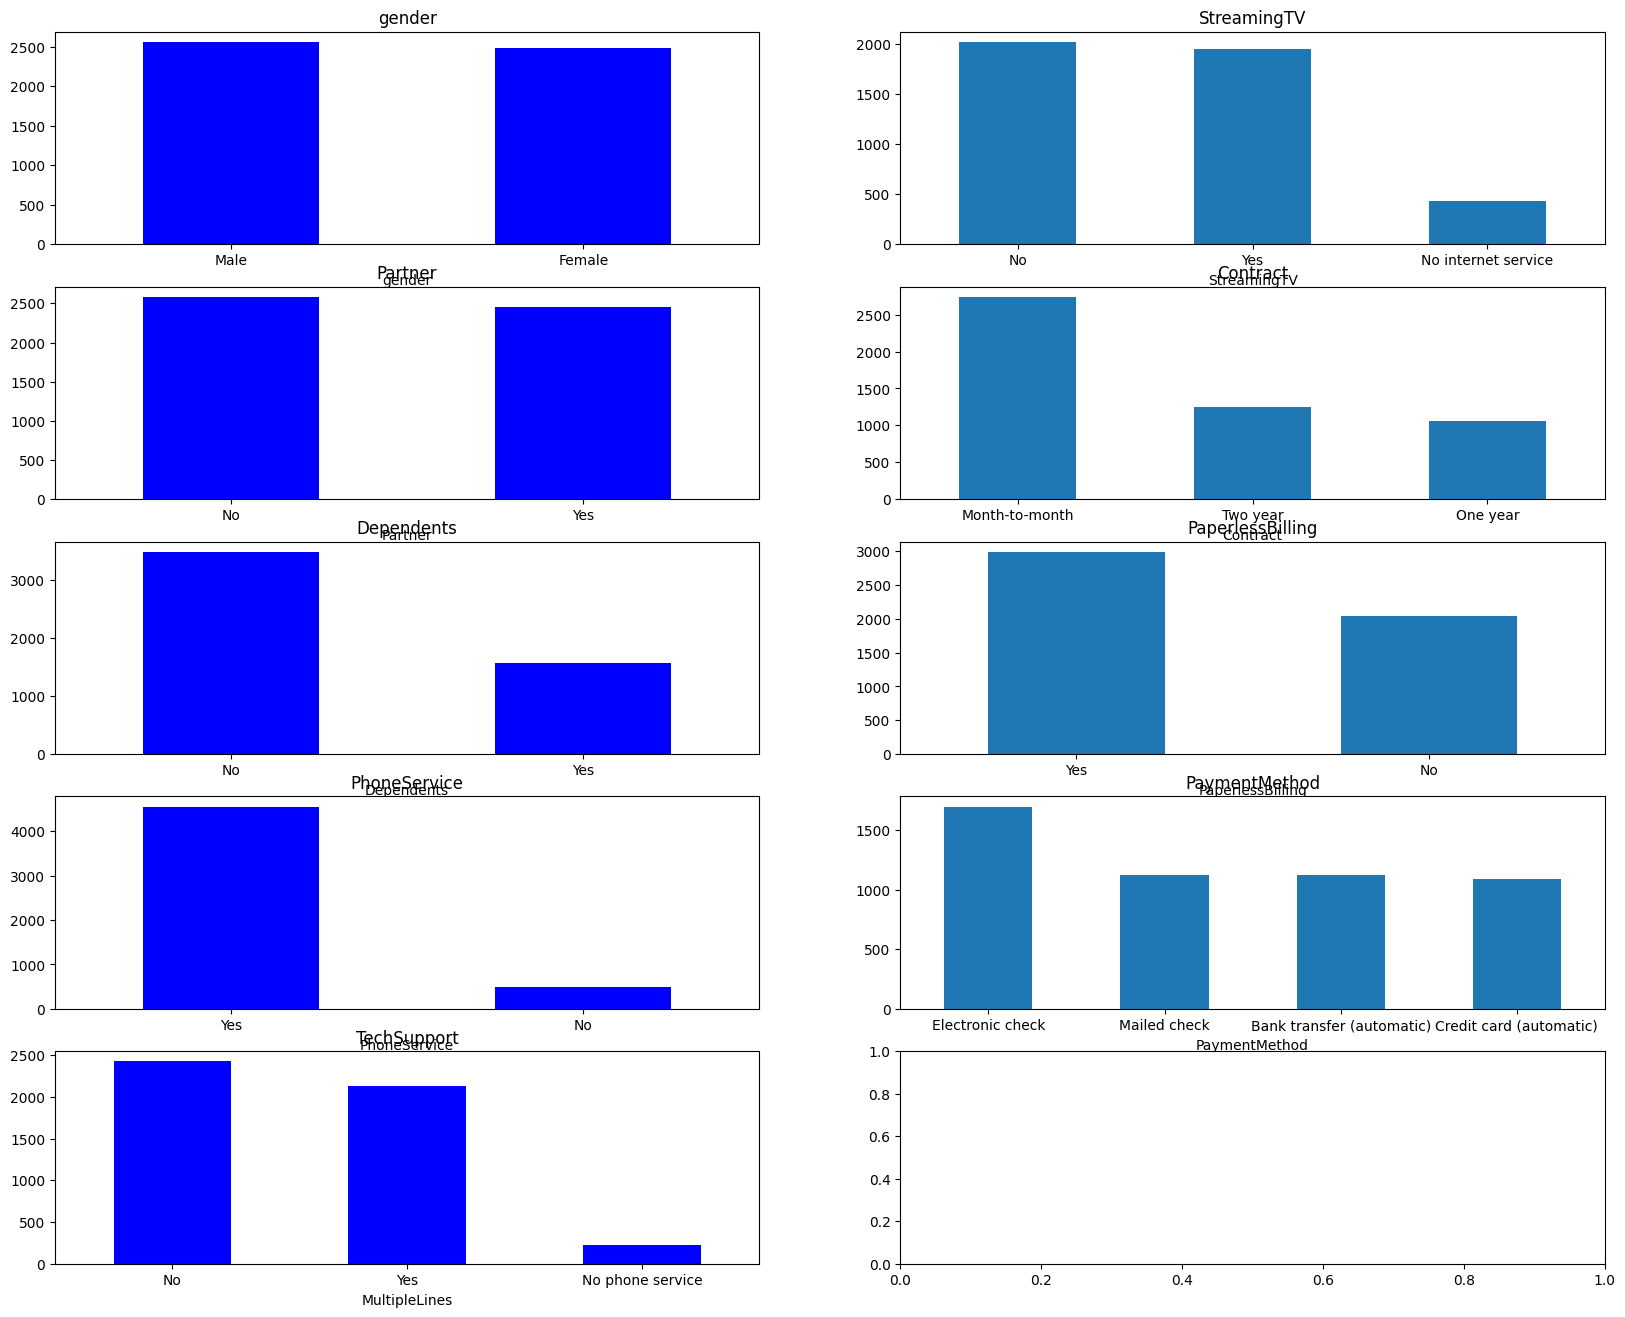

In [62]:
# Distribution of Categorical coulmns
Categorical_columns = concatenated_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']]
fig, axes = plt.subplots(nrows = 5,ncols = 2, figsize = (20,16),squeeze=False)



for i, feature in enumerate(Categorical_columns):
    if i < 5:
        ax = concatenated_data[feature].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blue')
    
   
    elif i >=10 and i < 15:
        ax = concatenated_data[feature].value_counts().plot(kind = 'bar',ax=axes[i-10,1],rot = 0)

    ax.set_title(feature)

Multi variate Data Analysis

In [63]:
# Convert categorical columns to numeric using label encoding
concatenated_data['customerID'] = concatenated_data['customerID'].astype('category').cat.codes


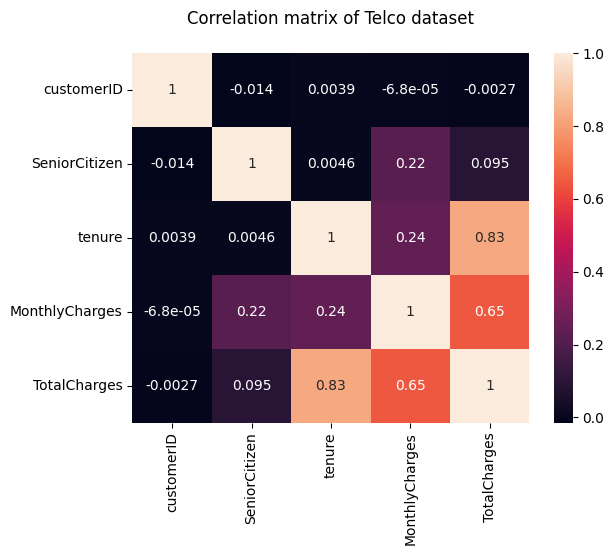

In [64]:
# Finding the correlation among the numeric variables.
numeric_columns = concatenated_data.select_dtypes(include='number')
correlation = numeric_columns.corr()

# Plotting the heatmap
heatmap = sns.heatmap(correlation, annot=True, annot_kws={'size': 10})
heatmap.set_title("Correlation matrix of Telco dataset\n")
plt.show()
